# Course Project – IME692, Fall 2020

#### Use the datasets uploaded with this document to complete this assignment. There are two files: train.csv and test.csv. Use train.csv to train your prediction model and test.csv to only test the performance of the prediction model using misclassification error rate. There are twenty predictors labeled 𝑥1,𝑥2,....,𝑥20 and the dependent variable y has binary class labels (0 and 1). Your project report should contain following information.

(a) Develop a classification model that has lowest misclassification error rate on the test data. What is the training error rate for this model? Also, provide a brief explanation for the good performance of this model. (Hint: a good classification model should have test misclassification error rate below 0.20).

(b) Document all models you experimented with to evaluate the performance on the test data. The code used for these models should be uploaded along with your submission. The report should include a brief description of all classification models you have used to complete the assignment. If you are using a classification model that is not covered in the course, then provide an appropriate reference for this model.

(c) Generate ROC curve for the best performing classification model. How would you interpret the findings from the ROC curve?

(d) Briefly mention the contribution of each team member in the project

In [2]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import tree
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import classification_report, accuracy_score, RocCurveDisplay, roc_curve, auc, confusion_matrix
%matplotlib inline 

In [3]:
#importing training and test Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# Spliting Data and Target Variable
Y = train['y']
Y_test = test['y']
X = train.drop(['y'], axis=1)
X_test = test.drop('y', axis=1)

## PRINCIPAL COMPONENT ANALYSIS

Text(0.5, 1.0, 'Box PLot for each feature')

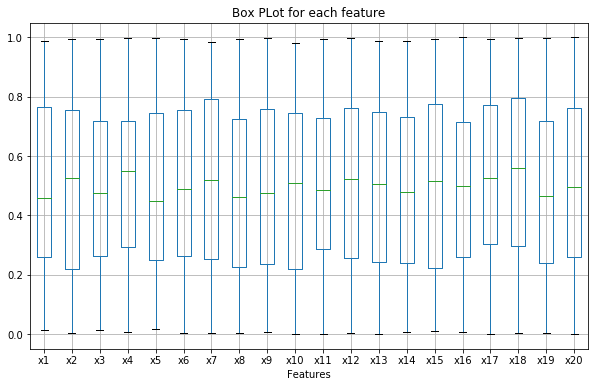

In [5]:
## Plotting box plot for each variable to understand their distribution
plt.figure(figsize=(10,6))
X.boxplot(column=list(X.columns))
plt.xlabel("Features")
plt.title("Box PLot for each feature")

Observation:
1. All features have similar distribution
2. No outliers
2. values of all features in between 0 and 1

([<matplotlib.axis.XTick at 0x1de046e50c8>,
 <a list of 20 Text xticklabel objects>)

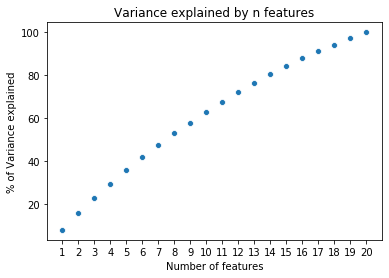

In [6]:
# determing variance explained by n feature taken at a time
pca = PCA()
varr = []
for n in range(1,21):
    pca = PCA(n_components=n)
    X_train = pca.fit_transform(X)
    explained_variance = pca.explained_variance_ratio_
    varr.append(100*(explained_variance).sum())

## ploting the results
sns.scatterplot(x = range(1,21), y = varr)
plt.title("Variance explained by n features")
plt.xlabel('Number of features')
plt.ylabel("% of Variance explained")
plt.xticks(range(1,21))

Observations:
1. PCA is not a good techniqe for this problem as no set of features explain variance

In [7]:
## MODELS ACCURACY IN TEST AND TRAIN DATA SET
test_acc = {}
train_acc = {}

# Logistic Regression

In [34]:
# calling model
test_model = LogisticRegression()
# fitting  model
test_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = test_model.predict(X_test)
print("======= TEST SET =======")
print("The Accuracy is: ", accuracy_score(Y_test, y_pred))
print("The Misclassification Error is: ", round(1- accuracy_score(Y_test, y_pred),5))
print("============================================================")
print("Summary of Model")
print(classification_report(Y_test, y_pred))
print("============================================================")
test_acc[test_model] = 1- accuracy_score(Y_test, y_pred)

y_pred = test_model.predict(X)
print("======= TRANING SET =======")
print("The Accuracy is: ", accuracy_score(Y, y_pred))
print("The Misclassification Error is: ", round(1- accuracy_score(Y, y_pred),5))
print("============================================================")
print("Summary of Model")
print(classification_report(Y, y_pred))
print("============================================================")
train_acc[test_model] = 1- accuracy_score(Y, y_pred)

======= TEST SET =======
The Accuracy is:  0.832
The Misclassification Error is:  0.168
Summary of Model
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       491
           1       0.85      0.81      0.83       509

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

======= TRANING SET =======
The Accuracy is:  0.9
The Misclassification Error is:  0.1
Summary of Model
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       103
           1       0.90      0.90      0.90        97

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



Text(0, 0.5, 'Importance')

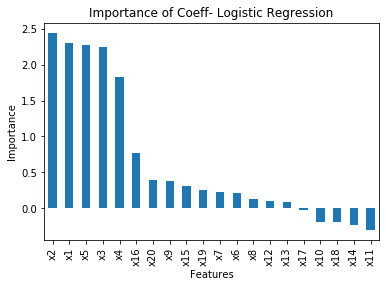

In [36]:
r = pd.DataFrame(test_model.coef_.T, columns=['Weight of Coeff'], index=X.columns)
(r['Weight of Coeff'].sort_values(ascending = False)).plot.bar()
plt.title('Importance of Coeff- Logistic Regression')
plt.xlabel("Features")
plt.ylabel('Importance')

# Decision Tree Classifier 

In [10]:
# calling model
test_model = DecisionTreeClassifier()
# fitting  model
test_model.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
y_pred = test_model.predict(X_test)
print("======= TEST SET =======")
print("The Accuracy is: ", accuracy_score(Y_test, y_pred))
print("The Misclassification Error is: ", round(1- accuracy_score(Y_test, y_pred),5))
print("============================================================")
print("Summary of Model")
print(classification_report(Y_test, y_pred))
print("============================================================")
test_acc[test_model] = 1- accuracy_score(Y_test, y_pred)
y_pred = test_model.predict(X)
print("======= TRANING SET =======")
print("The Accuracy is: ", accuracy_score(Y, y_pred))
print("The Misclassification Error is: ", round(1- accuracy_score(Y, y_pred),5))
print("============================================================")
print("Summary of Model")
print(classification_report(Y, y_pred))
print("============================================================")
train_acc[test_model] = 1- accuracy_score(Y, y_pred)

======= TEST SET =======
The Accuracy is:  0.691
The Misclassification Error is:  0.309
Summary of Model
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       491
           1       0.72      0.65      0.68       509

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000

======= TRANING SET =======
The Accuracy is:  1.0
The Misclassification Error is:  0.0
Summary of Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        97

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



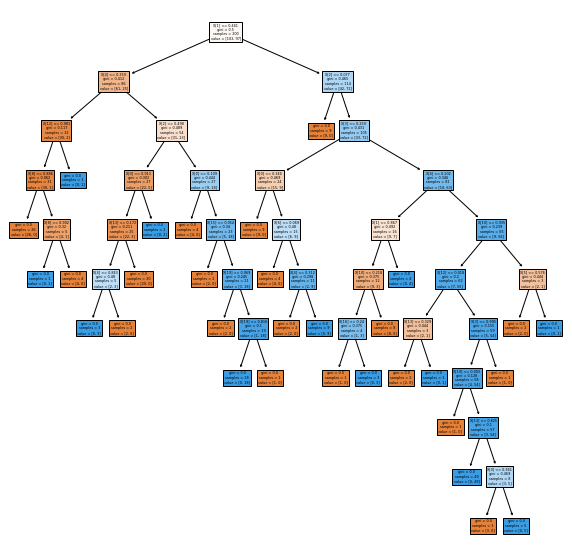

In [12]:
# plotting the tree
plt.figure(figsize=(10,10))
tree.plot_tree(test_model, filled=True)
plt.show()

Text(0, 0.5, 'Importance')

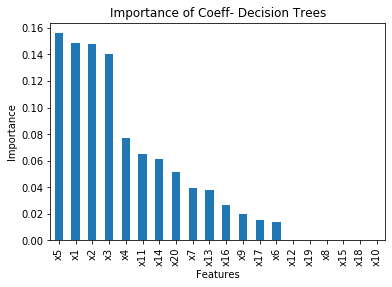

In [13]:
## plotting importance of features 
r = pd.DataFrame(test_model.feature_importances_.T, columns=['Weight of Coeff'], index=X.columns)

(r['Weight of Coeff'].sort_values(ascending = False)).plot.bar()
plt.title('Importance of Coeff- Decision Trees')
plt.xlabel("Features")
plt.ylabel('Importance')

# Support Vector Machines

In [39]:
# calling model
test_model = SVC()
# fitting  model
test_model.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
y_pred = test_model.predict(X_test)
print("======= TEST SET =======")
print("The Accuracy is: ", accuracy_score(Y_test, y_pred))
print("The Misclassification Error is: ", round(1- accuracy_score(Y_test, y_pred),5))
print("============================================================")
print("Summary of Model")
print(classification_report(Y_test, y_pred))
print("============================================================")
test_acc[test_model] = 1- accuracy_score(Y_test, y_pred)
y_pred = test_model.predict(X)
print("======= TRANING SET =======")
print("The Accuracy is: ", accuracy_score(Y, y_pred))
print("The Misclassification Error is: ", round(1- accuracy_score(Y, y_pred),5))
print("============================================================")
print("Summary of Model")
print(classification_report(Y, y_pred))
print("============================================================")
train_acc[test_model] = 1- accuracy_score(Y, y_pred)

======= TEST SET =======
The Accuracy is:  0.817
The Misclassification Error is:  0.183
Summary of Model
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       491
           1       0.83      0.80      0.82       509

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000

======= TRANING SET =======
The Accuracy is:  0.96
The Misclassification Error is:  0.04
Summary of Model
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       103
           1       0.98      0.94      0.96        97

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [41]:
# optimizing the parameter C in SVC
C=[0.1,1,10,100]
train_error = []
test_error = []
for c in C:
    clf=SVC(kernel='linear', C=c).fit(X,Y)
    train_error.append(1-clf.score(X,Y))
    test_error.append(1-clf.score(X_test, Y_test))

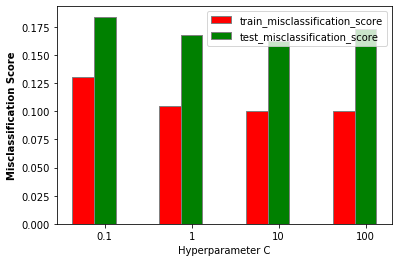

In [43]:
  
# set height of bar 
train_misclassification_score=train_error
test_misclassification_score= test_error
   
# Set position of bar on X axis 
br1 = np.arange(len(bars1)) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, train_misclassification_score, color ='r', width = barWidth, 
        edgecolor ='grey', label ='train_misclassification_score') 
plt.bar(br2, test_misclassification_score, color ='g', width = barWidth, 
        edgecolor ='grey', label ='test_misclassification_score') 

   
# Adding Xticks  
plt.xlabel('Hyperparameter C') 
plt.ylabel('Misclassification Score', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(train_misclassification_score))], 
           ['0.1', '1', '10', '100']) 
plt.legend()   
plt.show()

Observation:
1. The accuracy is maximum for c=10 in test set. 

# KNN

In [19]:
# calling model
test_model = KNeighborsClassifier()
# fitting  model
test_model.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
y_pred = test_model.predict(X_test)
print("======= TEST SET =======")
print("The Accuracy is: ", accuracy_score(Y_test, y_pred))
print("The Misclassification Error is: ", round(1- accuracy_score(Y_test, y_pred),5))
print("============================================================")
print("Summary of Model")
print(classification_report(Y_test, y_pred))
print("============================================================")
test_acc[test_model] = 1- accuracy_score(Y_test, y_pred)
y_pred = test_model.predict(X)
print("======= TRANING SET =======")
print("The Accuracy is: ", accuracy_score(Y, y_pred))
print("The Misclassification Error is: ", round(1- accuracy_score(Y, y_pred),5))
print("============================================================")
print("Summary of Model")
print(classification_report(Y, y_pred))
print("============================================================")
train_acc[test_model] = 1- accuracy_score(Y, y_pred)

======= TEST SET =======
The Accuracy is:  0.664
The Misclassification Error is:  0.336
Summary of Model
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       491
           1       0.67      0.68      0.67       509

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000

======= TRANING SET =======
The Accuracy is:  0.77
The Misclassification Error is:  0.23
Summary of Model
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       103
           1       0.74      0.80      0.77        97

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



In [21]:
# optimizing the value of k
train_error = []
test_error = []
for n in range(3,20):
    clf=KNeighborsClassifier(n_neighbors=n).fit(X,Y)
    train_error.append(1-clf.score(X,Y))
    test_error.append(1-clf.score(X_test, Y_test))

Text(0.5, 1.0, 'Error on Train and Test Set for Different values of K')

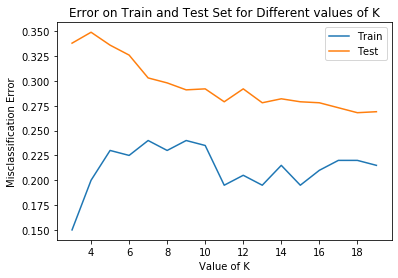

In [22]:
sns.lineplot(y = train_error, x = range(3,20), label ='Train')
sns.lineplot(y = test_error, x = range(3,20), label = 'Test')
plt.xlabel('Value of K')
plt.ylabel('Misclassification Error')
plt.title("Error on Train and Test Set for Different values of K")

# Optimizing Logistic Regression 

In [23]:
# sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [24]:
# calling model
test_model = LinearRegression()
#fitting model
test_model.fit(X,Y)
# test predicitons
test_pred = test_model.predict(X_test)
# train predicitons
train_pred = test_model.predict(X)

In [25]:
## optimizing the value of threshold probability

value_test = {}
value_train = {}
for thrs in range(30,70):
    thrs = thrs/100
    pred_bool = (sigmoid(train_pred)>thrs)
    pred = np.multiply(pred_bool, 1)
    value_train[thrs] = 1 - accuracy_score(Y, pred)
    
    pred_bool = (sigmoid(test_pred)>thrs)
    pred = np.multiply(pred_bool, 1)
    value_test[thrs] = 1 - accuracy_score(Y_test, pred)

Text(0, 0.5, 'Misclassification Error')

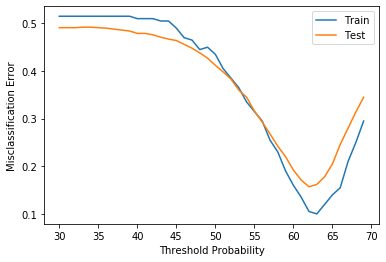

In [26]:
# plotting the values
sns.lineplot(x=range(30,70), y =list(value_train.values()), label = 'Train')
sns.lineplot(x=range(30,70), y =list(value_test.values()), label = 'Test')
plt.xlabel("Threshold Probability")
plt.ylabel("Misclassification Error")

Observation:
1. for threshold probability 0.62 is th optimal probability

In [27]:
# setting the probability as 0.62
y_pred = np.multiply(sigmoid(test_pred)>0.62, 1)
print("======= TEST SET =======")
print("The Accuracy is: ", accuracy_score(Y_test, y_pred))
print("The Misclassification Error is: ", round(1- accuracy_score(Y_test, y_pred),5))
print("============================================================")
print("Summary of Model")
print(classification_report(Y_test, y_pred))
print("============================================================")
test_acc['Optimized Logisitc'] = 1- accuracy_score(Y_test, y_pred)
y_pred = np.multiply(sigmoid(train_pred)>0.62, 1)
print("======= TRANING SET =======")
print("The Accuracy is: ", accuracy_score(Y, y_pred))
print("The Misclassification Error is: ", round(1- accuracy_score(Y, y_pred),5))
print("============================================================")
print("Summary of Model")
print(classification_report(Y, y_pred))
print("============================================================")
train_acc['Optimized Logisitc'] = 1- accuracy_score(Y, y_pred)

======= TEST SET =======
The Accuracy is:  0.843
The Misclassification Error is:  0.157
Summary of Model
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       491
           1       0.84      0.85      0.85       509

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000

======= TRANING SET =======
The Accuracy is:  0.895
The Misclassification Error is:  0.105
Summary of Model
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       103
           1       0.88      0.91      0.89        97

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



# Model Selection

In [28]:
pd.DataFrame([test_acc.values(), train_acc.values()], columns=test_acc.keys(), index=['Test Error', 'Train Error']).T

,Test Error,Train Error
"LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, l1_ratio=None, max_iter=100,\n multi_class='auto', n_jobs=None, penalty='l2',\n random_state=None, solver='lbfgs', tol=0.0001, verbose=0,\n warm_start=False)",0.168,0.100
"DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',\n max_depth=None, max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')",0.309,0.000
"SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,\n decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',\n max_iter=-1, probability=False, random_state=None, shrinking=True,\n tol=0.001, verbose=False)",0.183,0.040
"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=None, n_neighbors=5, p=2,\n weights='uniform')",0.336,0.230
Optimized Logisitc,0.157,0.105


Observation
1. Optimized Logsitic regression is the best model giving the least error in test set

In [29]:
final_y_test =  np.multiply(sigmoid(test_pred)>0.62, 1)
final_y_train = np.multiply(sigmoid(train_pred)>0.62, 1)

# Decison Boundary
Using Logisitc Regression and PCA(n_components = 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


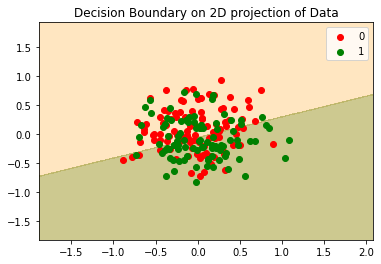

In [30]:
X_train = PCA(n_components=2).fit_transform(X)
plt.clf()
x = X_train
y = Y
X_set, y_set = x,y

svm = LogisticRegression()
svm.fit(x, y)
 
predicted = svm.predict(x)

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navajowhite', 'darkkhaki')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Boundary on 2D projection of Data')
plt.legend()
plt.show()

# Cross validation on Logistic Regression

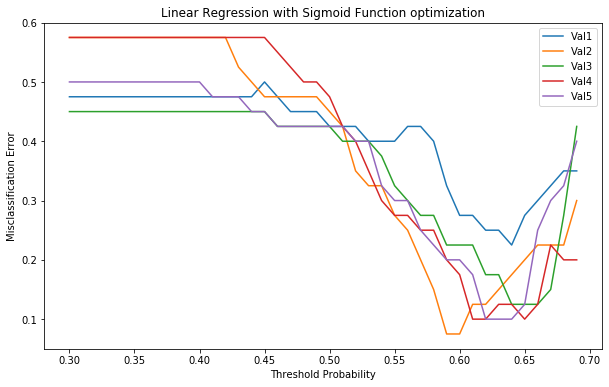

In [38]:
from sklearn.model_selection import KFold # Import KFold from model selection
kf = KFold(n_splits=5)  # Taking no of splits=5
arr=[]
arr1=[]
i=0
for train, test in kf.split(X):  # Running loop on 5 validation datasets
    X_train1=X.loc[train] #validation training data
    y_train1=y.loc[train] # validation training label
    X_test1=X.loc[test]  # validation test data
    y_test1=y.loc[test]  # validation test label
    model = LinearRegression() 
    model.fit(X_train1,y_train1) # model fitting
    predicitons = model.predict(X_test1) # predicting on validation test data 
    value = {} # making a dictionary named value which take key as threshold value and value as misclassification error
    for thrs in range(30,70): #looping threshold value in range(30,70)
        thrs = thrs/100
        pred_bool = (sigmoid(predicitons)>thrs) # if sigmoid function greater than threshold will give oputput 1 else 0
        pred = np.multiply(pred_bool, 1)
        value[thrs] = 1 - accuracy_score(y_test1, pred)
    x = {k: v for k, v in sorted(value.items(), key=lambda item: item[1])}
    if i==0:# for 1st validation storing value_0
        value_0=value 
    elif i==1: # for 2nd validation
        value_1=value
    elif i==2: # for 3rd validation
        value_2=value
    elif i==3: # for 4th validation
        value_3=value
    elif i==4: # for 5th validation
        value_4=value
    arr.append(list(x.keys())[0])
    arr1.append(list(x.values())[0])
    i+=1

plt.figure(figsize=(10,6)) #Plotting figure
x_=list(value_0.keys())
y_=list(value_0.values())
plt.plot(x_,y_,label='Val1') # PLotting line graph where X-axis is threshold value
x_=list(value_1.keys())       # and Y-Axis is misclassification error
y_=list(value_1.values())     # on 5 Validation give 5 different line plots.
plt.plot(x_,y_,label='Val2')
x_=list(value_2.keys())
y_=list(value_2.values())
plt.plot(x_,y_,label='Val3')
x_=list(value_3.keys())
y_=list(value_3.values())
plt.plot(x_,y_,label='Val4')
x_=list(value_4.keys())
y_=list(value_4.values())
plt.plot(x_,y_,label='Val5')
plt.xlabel('Threshold Probability')
plt.ylabel('Misclassification Error')
plt.title('Linear Regression with Sigmoid Function optimization')
plt.legend()

# ROC CURVE

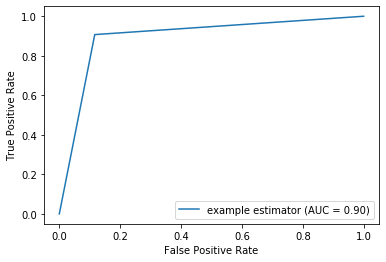

In [31]:
fpr, tpr, thresholds = roc_curve(Y, final_y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr, tpr, roc_auc,estimator_name='example estimator')
fig = display.plot()

# CONFUSION MATRIX

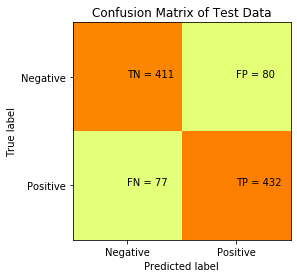

In [32]:
## For test data
cm = confusion_matrix(Y_test,final_y_test)
 
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

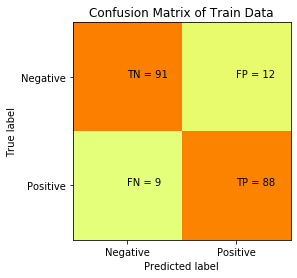

In [33]:
## For train data
cm = confusion_matrix(Y,final_y_train)
 
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))